In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [64]:
import data_preprocessing

energy_consumption_data_train, energy_consumption_data_test = data_preprocessing.preprocess_data("Energy Consumption Dataset.csv")

energy_consumption_data_train.head()

,Wind Velocity for Station 02014,Sun Duration for Station 02014,Air Temperature for Station 02014,Precipitation Amount for Station 02014,Wind Velocity for Station 03987,Sun Duration for Station 03987,Air Temperature for Station 03987,Precipitation Amount for Station 03987,Wind Velocity for Station 03379,Sun Duration for Station 03379,Air Temperature for Station 03379,Precipitation Amount for Station 03379,Wind Velocity for Station 04928,Sun Duration for Station 04928,Air Temperature for Station 04928,Precipitation Amount for Station 04928,Quarter,Month,Energy Consumption
2015-02-20 10:00:00,0.469072,0.033333,0.408425,0.0,0.260638,0.000000,0.283465,0.0,0.141975,1.0,0.458498,0.0,0.291925,1.0,0.357285,0.0,1,2,42923.00
2015-02-20 11:00:00,0.371134,0.733333,0.434066,0.0,0.239362,0.683333,0.364173,0.0,0.129630,1.0,0.494071,0.0,0.260870,1.0,0.423154,0.0,1,2,40497.00
2015-02-20 12:00:00,0.350515,0.016667,0.454212,0.0,0.308511,1.000000,0.405512,0.0,0.203704,1.0,0.509881,0.0,0.260870,1.0,0.489022,0.0,1,2,40872.00
2015-02-20 13:00:00,0.412371,0.050000,0.459707,0.0,0.345745,1.000000,0.427165,0.0,0.148148,1.0,0.521739,0.0,0.254658,1.0,0.504990,0.0,1,2,42470.75
2015-02-20 14:00:00,0.319588,0.016667,0.459707,0.0,0.265957,0.766667,0.437008,0.0,0.080247,1.0,0.537549,0.0,0.416149,1.0,0.508982,0.0,1,2,46082.25


In [65]:
# target for train and test
target_train = energy_consumption_data_train["Energy Consumption"]
target_test = energy_consumption_data_test["Energy Consumption"]

# dropped target
energy_consumption_data_train = energy_consumption_data_train.drop(columns="Energy Consumption")
energy_consumption_data_test = energy_consumption_data_test.drop(columns="Energy Consumption")

display(energy_consumption_data_train.head())
display(energy_consumption_data_test.head())

,Wind Velocity for Station 02014,Sun Duration for Station 02014,Air Temperature for Station 02014,Precipitation Amount for Station 02014,Wind Velocity for Station 03987,Sun Duration for Station 03987,Air Temperature for Station 03987,Precipitation Amount for Station 03987,Wind Velocity for Station 03379,Sun Duration for Station 03379,Air Temperature for Station 03379,Precipitation Amount for Station 03379,Wind Velocity for Station 04928,Sun Duration for Station 04928,Air Temperature for Station 04928,Precipitation Amount for Station 04928,Quarter,Month
2015-02-20 10:00:00,0.469072,0.033333,0.408425,0.0,0.260638,0.000000,0.283465,0.0,0.141975,1.0,0.458498,0.0,0.291925,1.0,0.357285,0.0,1,2
2015-02-20 11:00:00,0.371134,0.733333,0.434066,0.0,0.239362,0.683333,0.364173,0.0,0.129630,1.0,0.494071,0.0,0.260870,1.0,0.423154,0.0,1,2
2015-02-20 12:00:00,0.350515,0.016667,0.454212,0.0,0.308511,1.000000,0.405512,0.0,0.203704,1.0,0.509881,0.0,0.260870,1.0,0.489022,0.0,1,2
2015-02-20 13:00:00,0.412371,0.050000,0.459707,0.0,0.345745,1.000000,0.427165,0.0,0.148148,1.0,0.521739,0.0,0.254658,1.0,0.504990,0.0,1,2
2015-02-20 14:00:00,0.319588,0.016667,0.459707,0.0,0.265957,0.766667,0.437008,0.0,0.080247,1.0,0.537549,0.0,0.416149,1.0,0.508982,0.0,1,2


,Wind Velocity for Station 02014,Sun Duration for Station 02014,Air Temperature for Station 02014,Precipitation Amount for Station 02014,Wind Velocity for Station 03987,Sun Duration for Station 03987,Air Temperature for Station 03987,Precipitation Amount for Station 03987,Wind Velocity for Station 03379,Sun Duration for Station 03379,Air Temperature for Station 03379,Precipitation Amount for Station 03379,Wind Velocity for Station 04928,Sun Duration for Station 04928,Air Temperature for Station 04928,Precipitation Amount for Station 04928,Quarter,Month
2021-05-24 12:00:00,0.314433,0.666667,0.679487,0.0,0.191489,0.850000,0.671260,0.0,0.129630,0.00,0.622530,0.000000,0.236025,0.383333,0.610778,0.0,2,5
2021-05-24 13:00:00,0.407216,0.500000,0.672161,0.0,0.303191,0.916667,0.671260,0.0,0.228395,0.00,0.640316,0.000000,0.291925,0.366667,0.610778,0.0,2,5
2021-05-24 14:00:00,0.350515,0.250000,0.670330,0.0,0.271277,1.000000,0.681102,0.0,0.216049,0.15,0.628458,0.000000,0.254658,0.000000,0.616766,0.0,2,5
2021-05-24 15:00:00,0.391753,0.650000,0.686813,0.0,0.196809,0.733333,0.665354,0.0,0.129630,0.00,0.588933,0.000000,0.316770,0.050000,0.620758,0.0,2,5
2021-05-24 16:00:00,0.221649,0.116667,0.655678,0.0,0.175532,0.616667,0.663386,0.0,0.141975,0.00,0.555336,0.014815,0.167702,0.000000,0.612774,0.0,2,5


## Fitting the Model onto the Training Data ##

In [77]:
linReg = LinearRegression()

linReg.fit(energy_consumption_data_train, target_train)

LinearRegression()

In [78]:
m = linReg.coef_
m

array([-30938.42265132,   -831.98355643,    -43.97963221,  -5674.24970253,
       -33244.14010451,   -568.87496349, -12473.00478777,  -8552.11145339,
        -2024.63217174,   -952.74831118,  -1404.19967935,   7285.58796746,
        -6196.9167627 ,  -1327.23397194,  -2666.34941394,  12266.51538789,
          541.70456643,   -121.61297152])

In [79]:
predict_train = linReg.predict(energy_consumption_data_train)
predict_train

array([33451.72661382, 35202.04024605, 33092.95636847, ...,
       33556.41761849, 32561.9618771 , 31377.6840418 ])

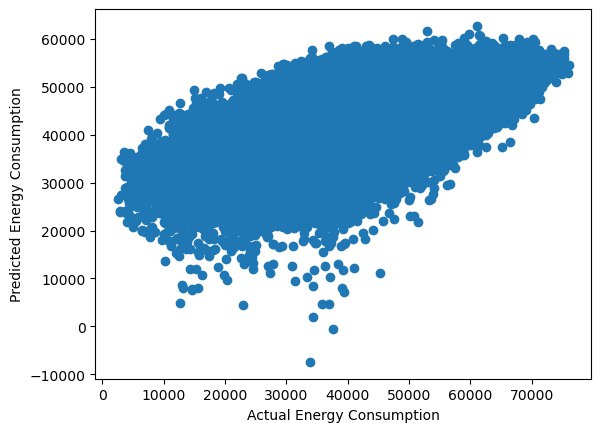

In [80]:
plt.scatter(target_train, predict_train)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.show()

## Evaluation with R2 and RMSE of Training ##

In [81]:
r2_score(target_train, predict_train)

0.3174885944957808

In [82]:
rmse = mean_squared_error(target_train, predict_train, squared=False)
rmse

10378.274977063022

## Testing the Trained Model with Testing Data ##

In [83]:
target = target_test.values.reshape(-1, 1)

predict_test = linReg.predict(target)

/Users/lara-aidajopp/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 18 features as input.

ValueError: x and y must be the same size

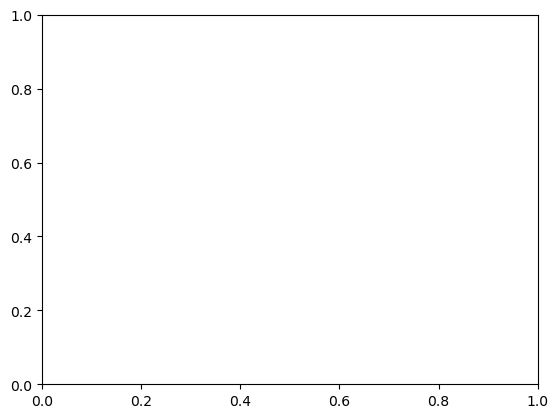

In [ ]:
# plot the original values
plt.scatter(target_train, energy_consumption_data_train, c='green', label='train')
plt.scatter(target_test, energy_consumption_data_test, c='blue', label='test')

# plot the predicted values
plt.plot(target_train, linReg.predict(target_test), c="red", label="prediction")

## Evaluation with R2 and RMSE of Test ##

## Exploring the Data for Station 02014 ##